In [26]:
import numpy as np  #utilizada para tratar vetores e matrizes
 
import pandas as pd  #utilizada para tratar dataframes
 
import matplotlib as mpl  #utilizada para tratar gráficos
import matplotlib.pyplot as plt
 
from sklearn import preprocessing  #utilizada para realizar o preprocessamento dos dados
from sklearn.model_selection import train_test_split # função utilizada para dividir do dataset entre treinamento e test
from sklearn.metrics import classification_report, confusion_matrix  #metrica de desempenho para o sklearn



In [27]:
# Realiza o download do dataset a ser utilizado.
!wget -q https://raw.githubusercontent.com/patrickmlong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv
data = pd.read_csv("data.csv")

In [28]:
data.head(5) #apresenta uma amostra do banco de dados

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# **Conhecendo os Dados**

In [29]:
#conhecendo o banco de dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [30]:
#Conhecendo o banco de dados
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [31]:
data.columns  #verificando os nomes das colunas do dataframe

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [32]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [33]:
data_new=data[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean']] #selecionando algumas colunas do dataframe

In [34]:
data_new.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)  #verifica a correlação entre os dados


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean
radius_mean,1.0,0.32,1.0,0.99,0.17,0.51,0.68
texture_mean,0.32,1.0,0.33,0.32,-0.023,0.24,0.3
perimeter_mean,1.0,0.33,1.0,0.99,0.21,0.56,0.72
area_mean,0.99,0.32,0.99,1.0,0.18,0.5,0.69
smoothness_mean,0.17,-0.023,0.21,0.18,1.0,0.66,0.52
compactness_mean,0.51,0.24,0.56,0.5,0.66,1.0,0.88
concavity_mean,0.68,0.3,0.72,0.69,0.52,0.88,1.0


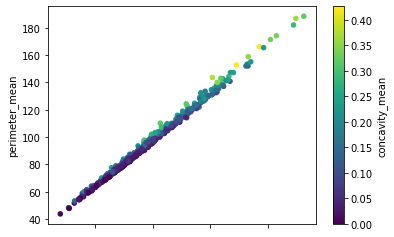

In [35]:
data_new.plot.scatter(x='radius_mean',y='perimeter_mean',c='concavity_mean',colormap='viridis')    #realiza o plot dos gráficos de dispersão

# **Limpando e Pre-processando os Dados**

In [36]:
data = data.drop('id',axis=1)   #retira o id 
data = data.drop('Unnamed: 32',axis=1) #retira a coluna Unnamed

In [37]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0}) # transformando os dados da coluna de diagnóstico (M - 1) e (B - 0)

In [38]:
data_n2 = pd.DataFrame(preprocessing.scale(data.iloc[:,1:32]))  # pega as colunas do dataframe (1 a 32) e realiza a normalização dos dados
data_n2.columns = list(data.iloc[:,1:32].columns)  #coloca o cabaçalho no "novo" dataframe
data_n2['diagnosis'] = data['diagnosis'] #coloca os valores para a saída (diagnóstico) no "novo" dataframe

In [65]:
data_n2.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1


In [66]:
data_out = data_n2.drop('diagnosis',axis=1)  # seleciona os valores para serem utilizados como entrada do dataframe
X = data_out.values  # cria o vetor de entrada 

In [67]:
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

# **Criando o Modelo de Deep Learning**

In [40]:
from keras.models import Sequential, Model  #utilizada para criar o modelo sequencial da MLP
from keras.layers import Dense, Dropout, Input #utilizada para criar as camadas da rede
from keras.optimizers import SGD #otimizador utilizado 

In [41]:
model = Sequential() #cria o objeto para o modelo sequencial
model.add(Dense(128,activation="relu",input_dim = np.shape(X)[1]))  # cria a camada inicial para os dados (deve conter a dimensão dos dados de entrada)
model.add(Dropout(0.25))  # adiciona a cada de dropout com 0.25% de neuronios "dropados"
model.add(Dense(32, activation='relu')) #adiciona a nova camada escodida
model.add(Dropout(0.25)) #adiciona o dropout
model.add(Dense(32, activation='relu')) #adiciona outra camada escondida
model.add(Dense(1, activation='sigmoid')) #adiciona a cadama de saída 


In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               3968      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 9,185
Trainable params: 9,185
Non-trainable params: 0
____________________________________________________

In [43]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)  #indica qual será o otimizador utilizado 


In [44]:
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy']) #indica qual será a função perda a ser utilizada

# **Realiza a Partição dos Dados**

In [45]:
#divide o conjunto de dados entre treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, data_n2['diagnosis'], test_size=0.3, random_state=0)

In [51]:
y_test

512    1
457    0
439    0
298    0
37     0
      ..
7      1
408    1
523    0
361    0
553    0
Name: diagnosis, Length: 171, dtype: int64

# Realiza o Treinamento do **Modelo**

In [46]:
#Treinamento do modelo
model.fit(X_train, y_train, epochs=150, batch_size=10) # X= entrada do modelo/ Y=target(saida do modelo) /epochs= número de iterações sobre o dataset
# batch_size= número de instancias do dataset que deve ser utilizado, por vez, para treinar o modelo

Epoch 1/150
40/40 [==============================] - 1s 1ms/step - loss: 0.5537 - accuracy: 0.7534
Epoch 2/150
40/40 [==============================] - 0s 1ms/step - loss: 0.1798 - accuracy: 0.9508
Epoch 3/150
40/40 [==============================] - 0s 1ms/step - loss: 0.0916 - accuracy: 0.9783
Epoch 4/150
40/40 [==============================] - 0s 1ms/step - loss: 0.0636 - accuracy: 0.9845
Epoch 5/150
40/40 [==============================] - 0s 1ms/step - loss: 0.0919 - accuracy: 0.9684
Epoch 6/150
40/40 [==============================] - 0s 1ms/step - loss: 0.0648 - accuracy: 0.9933
Epoch 7/150
40/40 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.9876
Epoch 8/150
40/40 [==============================] - 0s 1ms/step - loss: 0.0435 - accuracy: 0.9944
Epoch 9/150
40/40 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.9809
Epoch 10/150
40/40 [==============================] - 0s 1ms/step - loss: 0.0384 - accuracy: 0.9836
Epoch 11/

# **Realiza a Análise do Modelo**

In [47]:
#avaliar o modelo 
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

6/6 [==============================] - 0s 2ms/step - loss: 0.5272 - accuracy: 0.9474

accuracy: 94.74%


In [48]:
#realiza a previsão 
previsao_MLP = model.predict(X_test)

In [49]:
previsao_MLP[:30]

array([[1.0000000e+00],
       [5.6147896e-05],
       [4.7564803e-14],
       [9.1144543e-08],
       [2.7927047e-14],
       [1.1078719e-13],
       [1.8397153e-24],
       [2.5411262e-12],
       [8.1901008e-19],
       [1.4881446e-37],
       [2.4331212e-03],
       [1.1649946e-06],
       [1.4741716e-22],
       [9.9981999e-01],
       [1.5565014e-01],
       [1.0000000e+00],
       [4.2875077e-19],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [4.0883204e-08],
       [1.4897394e-12],
       [1.0000000e+00],
       [1.2422003e-16],
       [8.2274860e-20],
       [9.9999976e-01],
       [1.4732655e-12],
       [1.0000000e+00]], dtype=float32)

In [58]:
y_test

512    1
457    0
439    0
298    0
37     0
      ..
7      1
408    1
523    0
361    0
553    0
Name: diagnosis, Length: 171, dtype: int64

In [63]:
labels = (previsao_MLP > 0.5).astype(np.int)
labels

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
    

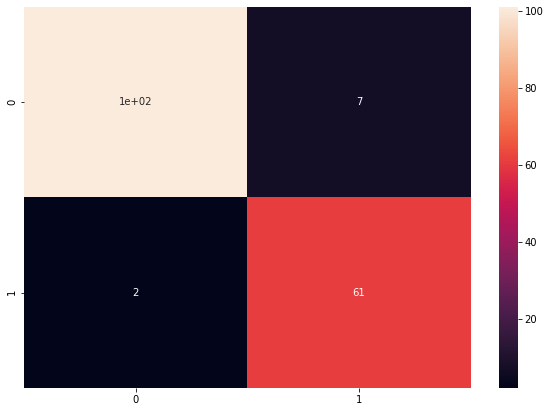

In [64]:
#matrix de confusão
matriz_confusao_mlp = confusion_matrix(y_test, labels) #constroi a matriz de confusao (numérica)

import seaborn
plt.figure(figsize = (10,7))
seaborn.heatmap(matriz_confusao_mlp, annot=True)
